<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-4-Sprint-1-NLP/blob/master/LS_DS_415_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
!python -m spacy download en_core_web_lg #instructions: after downloading, restart run time then run cells that follow

     |████████████████████████████████| 826.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=61de5c9cf32eb9c180d4f7f03b53a5563de0883dbe4371a3cc171c25adccbcfb
  Stored in directory: /tmp/pip-ephem-wheel-cache-pt9n7bhi/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
!wget https://raw.githubusercontent.com/Tclack88/DS-Unit-4-Sprint-1-NLP/master/data/review_sample.json

--2019-12-06 16:16:42--  https://raw.githubusercontent.com/Tclack88/DS-Unit-4-Sprint-1-NLP/master/data/review_sample.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7940763 (7.6M) [text/plain]
Saving to: ‘review_sample.json’

review_sample.json  100%[===================>]   7.57M  --.-KB/s    in 0.08s   

2019-12-06 16:16:42 (92.3 MB/s) - ‘review_sample.json’ saved [7940763/7940763]



In [0]:
import pandas as pd
import spacy

yelp = pd.read_json('review_sample.json', lines=True)

In [22]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [23]:
nlp = spacy.load('en_core_web_lg')

STOPWORDS = nlp.Defaults.stop_words


def tokenize(df):
  tokens = []
  for doc in nlp.pipe(yelp.text):
    doc_tokens = [token.lemma_ for token in doc if (token.text.lower() not in STOPWORDS) and (token.is_punct == False)]
    tokens.append(doc_tokens)
  df['tokens'] = tokens
  return df

tokenize(yelp)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, Lo..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, Togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[Vegas, dozen, time, step, foot, Circus, Circu..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, party, good, actual..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[3.5, 4, star, \n\n, bad, price, $, 12.99, lun..."
...,...,...,...,...,...,...,...,...,...,...
9995,1h3ysSuSazvXc1aeLiiOew,0,2017-10-07 10:57:15,1,kAYnguBAJ2Ovzz5s49fMcQ,1,My family and I were hungry and this Subway is...,1,QFYqAk8n5Z1O3t7zwjA7Hg,"[family, hungry, Subway, open, 24, hour, guy, ..."
9996,Rwahe1zbFpw6VIjb5ngZeg,0,2014-01-18 15:52:52,0,5Huai3nJAaeN8X0vCXqOew,3,My wife and I came here with a a couple of fri...,0,X7jQ-4788irfe5ABZNvYcA,"[wife, come, couple, friend, sever, excited, p..."
9997,8itGZAOBMiTbHKOwLuh4_Q,0,2018-08-26 02:53:21,0,wmRCto8yNnmMCNc_nfL5Dg,2,The food was just OK and not anything to brag ...,0,_pi5J_1CIQWceLhTJkx_yA,"[food, ok, brag, food, hot, item, tasty, horri..."
9998,A5Rkh7UymKm0_Rxm9K2PJw,0,2018-04-23 23:36:07,0,zlIU9GEI3MP5LXBpEM5qsw,4,Today's visit is great!! Love and enjoy Town S...,0,PP1K311ZKbpDgTjwic3u5Q,"[today, visit, great, love, enjoy, Town, Squar..."


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [0]:
# Vectorize review tokens and save as Document Term Matrix
# tokens must be in a string format
yelp.tokens = yelp.tokens.apply(lambda x: ' '.join(x))

vect = TfidfVectorizer(stop_words='english') # though stop words are not in the yelp dataframe, we include this to remove them in other sample sentences such as the fake review below
dtm = vect.fit_transform(yelp.tokens)

In [25]:
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree', n_jobs=2)
nn.fit(dtm.todense())

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=2, n_neighbors=5, p=2, radius=1.0)

In [0]:
fake_review = ["What a wonderful place to bring the grandchildren! Absolutely fantastic and friendly staff, 5 stars all around. I know where I will bring them this christmas"]
fake_review = vect.transform(fake_review) # convert fka review text to vector

In [0]:
similar_reviews = list(nn.kneighbors(fake_review.todense())[1][0])

In [38]:
# Verify virility
for i, review in enumerate(similar_reviews):
  print(f'{i}. : {yelp.text[review]}\n')

0. : Fast service with very knowledgeable staff. I have brought both of my vehicles here and will continue to bring them here for any future needs I have with tires. Highly recommended!

1. : I love this place!!!  The best salsa I have ever had!   Food is wonderful!!  I have been coming here since it was Super Mex.  LOVE THIS PLACE!  I bring all my friends here.

2. : This place is fantastic. Owners are great and friendly staff. The donuts or simply amazing!

3. : This place looks AMAZING. The art on the walls is bright and just makes you feel happy. Bring your appetite!!! Then order the fried pickles!!! They're amazing! The music is relaxed and the atmosphere rocks. 

This restaurant is different from the rest. Check em out! You really can't beat good food, a happy atmosphere, awesome decor, and did I say: DELICIOUS food?!?  

I'll be back soon!! This place is very family friendly so bring all of the kids! There's a lot of seating so bring a big group of friends.

4. : the baby christ

verdict: The reviews are positive and some involve similar keywords (friendly staff, christmas, amazing, fantastic)

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# Instantiate the pipeline tools (note: vectorizer already instantiated above)
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=10) # reduces matrix dimensionality to approximate similar transformation
xgb = XGBClassifier()

# Latent Semantic Indexing
lsi = Pipeline([('vect',vect), ('svd',svd)])

# pipeline of LSI then classification
pipeline = Pipeline([('lsi',lsi), ('xgb',xgb)])

In [0]:
param_distributions = {
    'lsi__vect__max_df' : (.75,1),
    'lsi__vect__max_features': (500,1000),
    'xgb__n_estimators' : (20,50,100),
    'xgb__max_depth': (5,10,20)}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions, cv=5, n_jobs=2, verbose=1)

In [50]:
random_search.fit(yelp.text, yelp.stars)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 26.6min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 27.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('lsi',
                                              Pipeline(memory=None,
                                                       steps=[('vect',
                                                               TfidfVectorizer(analyzer='word',
                                                                               binary=False,
                                                                               decode_error='strict',
                                                                               dtype=<class 'numpy.float64'>,
                                                                               encoding='utf-8',
                                                                               input='content',
                                                                               lowercase=True,
          

In [52]:
# Because I transformed the review and saved it as the same variable, I will re-paste the review here
fake_review = ["What a wonderful place to bring the grandchildren! Absolutely fantastic and friendly staff, 5 stars all around. I know where I will bring them this christmas"]
random_search.predict(fake_review)

array([5])

Interpretation: Fittingly good review, let's try a few more:

In [56]:
# in order, a bad review, a mediocre review and a good review
more_reviews = ["What a disgusting restaurant! I'm sure my  niece could do better. Food was overcooked on the outside and raw on the inside, I'm taking my business elsewhere", 
                "it was ok, not too expensive, it met my expectations, food was decent", 
                "the best!"]
predictions = random_search.predict(more_reviews)
for pred in predictions:
  print(pred)

1
3
5


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [0]:
from gensim.models import LdaMulticore
from gensim import corpora

Learn the vocubalary of the yelp data:

In [61]:
# tokens need to be in a list but above needed to be in a string, so I need to return them to a list below
yelp.tokens = yelp.tokens.apply(lambda x: x.split())
yelp.tokens

0       [beware, fake, fake, fake, small, business, Lo...
1       [come, lunch, Togo, service, quick, staff, fri...
2       [Vegas, dozen, time, step, foot, Circus, Circu...
3       [go, night, close, street, party, good, actual...
4       [3.5, 4, star, bad, price, $, 12.99, lunch, se...
                              ...                        
9995    [family, hungry, Subway, open, 24, hour, guy, ...
9996    [wife, come, couple, friend, sever, excited, p...
9997    [food, ok, brag, food, hot, item, tasty, horri...
9998    [today, visit, great, love, enjoy, Town, Squar...
9999    [absolute, bad, place, stay, 43, year, life, t...
Name: tokens, Length: 10000, dtype: object

In [0]:
id2word = corpora.Dictionary(yelp.tokens)

Create a bag of words representation of the entire corpus

In [0]:
corpus = [id2word.doc2bow(t) for t in yelp.tokens]

Your LDA model should be ready for estimation: 

In [0]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=2,
                   num_topics = 10, # You can change this parameter
                   random_state = 88)

Create 1-2 visualizations of the results

In [0]:
!pip install pyLDAvis

In [0]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [76]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.003436 -0.000606       1        1  10.888026
8      0.005673 -0.001478       2        1  10.486484
3     -0.001904 -0.001207       3        1  10.303322
2      0.000120  0.002707       4        1  10.268586
5     -0.001265 -0.000250       5        1   9.885854
4     -0.003843  0.001991       6        1   9.818501
0     -0.001939 -0.000822       7        1   9.755945
7      0.000223  0.004149       8        1   9.706915
6     -0.002015 -0.005512       9        1   9.446537
9      0.001514  0.001028      10        1   9.439829, topic_info=    Category         Freq     Term        Total  loglift  logprob
206  Default  4101.000000    great  4101.000000  30.0000  30.0000
371  Default  3299.000000    order  3299.000000  29.0000  29.0000
45   Default  6118.000000     good  6118.000000  28.0000  28.0000
50   Default  3449.000000  service  3449.000000  27.0000  27.0000
40   Default  1617.000000     wait  1617.000000  26.0000  26.0000
..       ...          ...      ...          ...      ...      ...
42   Topic10   278.865906     come  3744.177979  -0.2370  -5.1168
371  Topic10   241.458206    order  3299.256592  -0.2545  -5.2609
154  Topic10   157.111374    price  1688.770508  -0.0146  -5.6906
426  Topic10   141.419357      day  1453.233887   0.0304  -5.7958
390  Topic10   136.896271     take  1425.032715   0.0175  -5.8284

[841 rows x 6 columns], token_table=       Topic      Freq                                               Term
term                                                                     
0          1  0.142059                                                  $
0          2  0.085701                                                  $
0          3  0.110853                                                  $
0          4  0.109455                                                  $
0          5  0.126223                                                  $
...      ...       ...                                                ...
22411      3  0.583423                 ネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました
22412      3  0.583395  予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをして...
22581     10  0.583595  天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用...
22413      3  0.583425              旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした
22414      3  0.583405  質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のい...

[2659 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 4, 3, 6, 5, 1, 8, 7, 10])

In [78]:
lda.print_topics()

[(0,
  '0.012*"good" + 0.012*"order" + 0.009*"food" + 0.008*"place" + 0.008*"great" + 0.007*"time" + 0.006*"come" + 0.006*"like" + 0.006*"service" + 0.006*"get"'),
 (1,
  '0.014*"good" + 0.013*"place" + 0.011*"great" + 0.010*"food" + 0.010*"time" + 0.009*"like" + 0.008*"come" + 0.008*"service" + 0.007*"order" + 0.006*"get"'),
 (2,
  '0.015*"good" + 0.010*"food" + 0.009*"time" + 0.008*"place" + 0.007*"great" + 0.007*"come" + 0.007*"go" + 0.007*"service" + 0.007*"like" + 0.006*"get"'),
 (3,
  '0.012*"place" + 0.011*"good" + 0.010*"food" + 0.009*"come" + 0.008*"time" + 0.007*"try" + 0.007*"great" + 0.006*"service" + 0.006*"like" + 0.006*"love"'),
 (4,
  '0.012*"good" + 0.009*"place" + 0.008*"come" + 0.008*"food" + 0.008*"time" + 0.007*"like" + 0.007*"order" + 0.006*"get" + 0.006*"service" + 0.006*"try"'),
 (5,
  '0.011*"good" + 0.011*"place" + 0.009*"food" + 0.009*"like" + 0.008*"come" + 0.008*"time" + 0.007*"go" + 0.006*"great" + 0.006*"try" + 0.006*"$"'),
 (6,
  '0.011*"food" + 0.011*"p

## How very boring :/
These reviews are too similar :/ no time to go back though and refine, so here's another visualization:

In [80]:
!pip install wordcloud

In [0]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

In [82]:
topics = lda.print_topics()
topic_df = pd.DataFrame(topics, columns = ['topic','string'])
topic_df

,topic,string
0,0,"0.012*""good"" + 0.012*""order"" + 0.009*""food"" + ..."
1,1,"0.014*""good"" + 0.013*""place"" + 0.011*""great"" +..."
2,2,"0.015*""good"" + 0.010*""food"" + 0.009*""time"" + 0..."
3,3,"0.012*""place"" + 0.011*""good"" + 0.010*""food"" + ..."
4,4,"0.012*""good"" + 0.009*""place"" + 0.008*""come"" + ..."
5,5,"0.011*""good"" + 0.011*""place"" + 0.009*""food"" + ..."
6,6,"0.011*""food"" + 0.011*""place"" + 0.009*""time"" + ..."
7,7,"0.014*""good"" + 0.011*""place"" + 0.009*""great"" +..."
8,8,"0.015*""good"" + 0.012*""time"" + 0.011*""service"" ..."
9,9,"0.012*""great"" + 0.012*""good"" + 0.009*""place"" +..."


In [83]:
topic_df.string = topic_df.string.apply(lambda x: x.split(' + ')[:5])
topic_df['weights'] = topic_df.string.apply(lambda x: [float(entry.split('*')[0]) for entry in x])
topic_df['words'] = topic_df.string.apply(lambda x: [(entry.split('*')[1][1:-1]) for entry in x])
topic_df

,topic,string,weights,words
0,0,"[0.012*""good"", 0.012*""order"", 0.009*""food"", 0....","[0.012, 0.012, 0.009, 0.008, 0.008]","[good, order, food, place, great]"
1,1,"[0.014*""good"", 0.013*""place"", 0.011*""great"", 0...","[0.014, 0.013, 0.011, 0.01, 0.01]","[good, place, great, food, time]"
2,2,"[0.015*""good"", 0.010*""food"", 0.009*""time"", 0.0...","[0.015, 0.01, 0.009, 0.008, 0.007]","[good, food, time, place, great]"
3,3,"[0.012*""place"", 0.011*""good"", 0.010*""food"", 0....","[0.012, 0.011, 0.01, 0.009, 0.008]","[place, good, food, come, time]"
4,4,"[0.012*""good"", 0.009*""place"", 0.008*""come"", 0....","[0.012, 0.009, 0.008, 0.008, 0.008]","[good, place, come, food, time]"
5,5,"[0.011*""good"", 0.011*""place"", 0.009*""food"", 0....","[0.011, 0.011, 0.009, 0.009, 0.008]","[good, place, food, like, come]"
6,6,"[0.011*""food"", 0.011*""place"", 0.009*""time"", 0....","[0.011, 0.011, 0.009, 0.008, 0.007]","[food, place, time, order, service]"
7,7,"[0.014*""good"", 0.011*""place"", 0.009*""great"", 0...","[0.014, 0.011, 0.009, 0.008, 0.008]","[good, place, great, come, like]"
8,8,"[0.015*""good"", 0.012*""time"", 0.011*""service"", ...","[0.015, 0.012, 0.011, 0.011, 0.011]","[good, time, service, food, place]"
9,9,"[0.012*""great"", 0.012*""good"", 0.009*""place"", 0...","[0.012, 0.012, 0.009, 0.009, 0.008]","[great, good, place, like, food]"


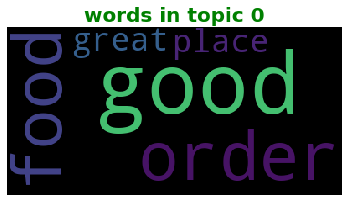

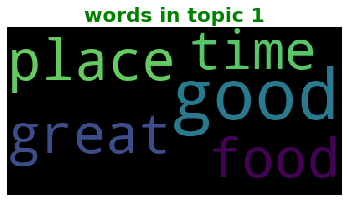

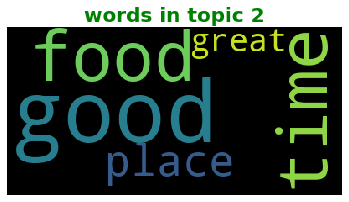

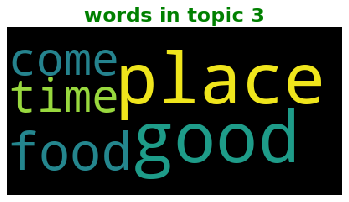

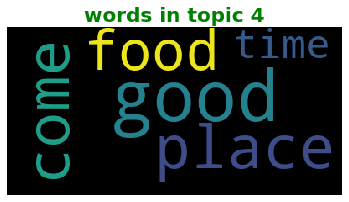

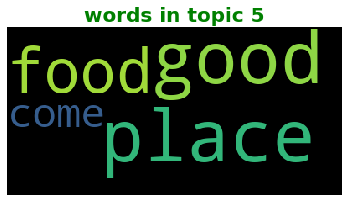

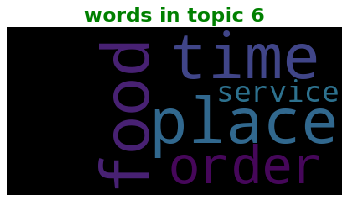

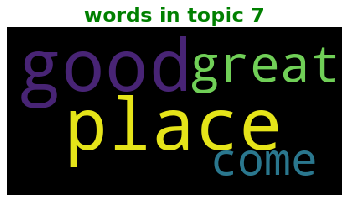

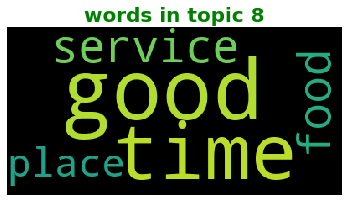

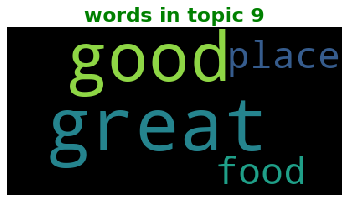

In [90]:
for i, words in enumerate(topic_df.words):
  word_string = ' '.join(words)
  wc = WordCloud().generate(word_string)
  plt.figure()
  plt.title(f"words in topic {i}",size=20,weight='bold',color='green')
  plt.axis('off')
  plt.imshow(wc)

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)